In [20]:
import ROOT
import sys
import numpy as np
import array
from math import sqrt, fabs, sin, exp, log10
from ROOT import TFile, TTree, TChain, TBranch, TH1D, TH1I, TH1F, TH2F, Math
from ROOT import TLorentzVector
from ROOT.Math import LorentzVector, VectorUtil
import matplotlib.pyplot as plt

In [37]:
f = TFile.Open('gamma_1GeV_1-0-0_x190_wopt_noB.root')

TLhits_array = []
BEhits_array = []

for entry in f.events:
    
    for TimingLayerHit in entry.SCEPCAL_TL_readout:
        TLhits_array.append(TimingLayerHit)
    for BarrelEndcapHit in entry.SCEPCAL_BE_readout:
        BEhits_array.append(BarrelEndcapHit)  

TLhits = np.array(TLhits_array)
BEhits = np.array(BEhits_array)

TL_x = np.array([hit.position.x for hit in TLhits])
TL_y = np.array([hit.position.y for hit in TLhits])
TL_z = np.array([hit.position.z for hit in TLhits])
TL_E = np.array([hit.energy for hit in TLhits])
TL_cID = np.array([hit.cellID for hit in TLhits])

BE_x = np.array([hit.position.x for hit in BEhits])
BE_y = np.array([hit.position.y for hit in BEhits])
BE_z = np.array([hit.position.z for hit in BEhits])
BE_E = np.array([hit.energy for hit in BEhits])
BE_cID = np.array([hit.cellID for hit in BEhits])


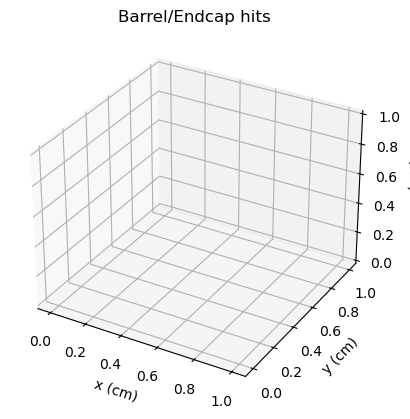

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(BE_x, BE_y, BE_z, c=BE_E)
ax.set_title('Barrel/Endcap hits')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')

plt.show()

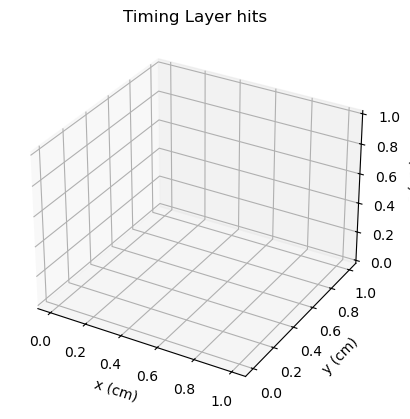

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(TL_x, TL_y, TL_z, c=TL_E)
ax.set_title('Timing Layer hits')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')

plt.show()

In [6]:
nentries = tree.GetEntries()
print("Number of events: ",nentries)

Number of events:  1000


In [12]:
for iev in range(nentries):
    if iev == 0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)

    if iev == 0:
        print(f'nGenJets: {tree.nGenJets}')
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev == 0:
            print(f'nGetJetParticles:\t {tree.nGenJetParticles[ijet]:.3f}\t'
                  f'M:\t {tree.genJetM[ijet]:.3f}\t'
                  f'Px:\t {tree.genJetPx[ijet]:.3f}\t'
                  f'Py:\t {tree.genJetPy[ijet]:.3f}\t'
                  f'Pz:\t {tree.genJetPz[ijet]:.3f}')
        for ipart in range(tree.nGenJetParticles[ijet]):
            if iev == 0:
                print(f'genJetParticleMvec:\t {tree.genJetParticleMvec[iptot+ipart]:.3f}\t'
                      f'genJetParticlePxvec:\t {tree.genJetParticlePxvec[iptot+ipart]:.3f}\t'
                      f'genJetParticlePyvec:\t {tree.genJetParticlePyvec[iptot+ipart]:.3f}\t'
                      f'genJetParticlePzvec:\t {tree.genJetParticlePzvec[iptot+ipart]:.3f}')
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
nGenJets: 13
nGetJetParticles:	 52.000	M:	 140.059	Px:	 -2740.116	Py:	 1367.059	Pz:	 603.811
genJetParticleMvec:	 0.000	genJetParticlePxvec:	 -869.697	genJetParticlePyvec:	 432.474	genJetParticlePzvec:	 190.709
genJetParticleMvec:	 0.498	genJetParticlePxvec:	 -537.802	genJetParticlePyvec:	 266.968	genJetParticlePzvec:	 117.534
genJetParticleMvec:	 0.000	genJetParticlePxvec:	 -435.175	genJetParticlePyvec:	 216.406	genJetParticlePzvec:	 95.330
genJetParticleMvec:	 0.494	genJetParticlePxvec:	 -279.667	genJetParticlePyvec:	 138.965	genJetParticlePzvec:	 61.806
genJetParticleMvec:	 0.494	genJetParticlePxvec:	 -103.951	genJetParticlePyvec:	 51.230	genJetParticlePzvec:	 22.019
genJetParticleMvec:	 0.140	genJetParticlePxvec:	 -90.315	genJetParticlePyvec:	 46.114	genJetParticlePzvec:	 19.702
genJetParticleMvec:	 0.140	genJetParticlePxvec:	 -79.527	genJetParticlePyvec:	 39.368	genJetParticlePzvec:	 17.506
genJetParticleMvec:	 0.494	genJetParticlePxvec:	 -47.657	genJetParticl

In [14]:
for iev in range(nentries):
    if iev == 0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)
    
    if iev == 0:
        print(tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev == 0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        iptot+=tree.nGenJetParticles[ijet]
        if iev == 0:
            print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())

Processing event:  0
13
52 140.05874599999999 -2740.115736725944 1367.058609737721 603.8113215131506
 redo: 140.05871037718498 -2740.1155442925738 1367.058811382133 603.8113112853786
57 167.604446 2596.803805258931 -1178.9047163842108 -2329.23802721571
 redo: 167.6043853081789 2596.8037645479785 -1178.9046599124927 -2329.2379330067915
54 26.79297 24.98630010922058 -184.16609809425088 387.83842240894046
 redo: 26.792954598947986 24.9863067103487 -184.16609859652903 387.838423849816
49 38.227272 136.00252953339782 35.45392101168659 3.113397929018018
 redo: 38.22725616977186 136.00253707595928 35.45392293901356 3.113397968107843
41 28.8544 17.6483706051969 -102.50081549399697 -35.350859988501526
 redo: 28.854391109463002 17.64836862906109 -102.50081915850336 -35.35086050871863
29 16.413583 -8.51913591411155 55.41438202402546 400.2312529923488
 redo: 16.413578149130164 -8.519133883594508 55.41438342155132 400.2312070092999
28 11.324736999999999 -2.670514590151329 38.73899430476151 -18.8005

In [15]:
for iev in range(nentries):
    if iev == 0:
        print("Processing event: ",iev)
    tree.GetEntry(iev)

    if iev == 0:
        print(tree.nGenJets)
    iptot = 0
    for ijet in range(tree.nGenJets):
        if iev == 0:
            print(tree.nGenJetParticles[ijet],tree.genJetM[ijet],tree.genJetPx[ijet],tree.genJetPy[ijet],tree.genJetPz[ijet])
        p4jet = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            # p4part are the jet generator particle 4-momenta in the lab frame
            p4jet += p4part
            #print(tree.genJetParticleMvec[iptot+ipart],tree.genJetParticlePxvec[iptot+ipart],tree.genJetParticlePyvec[iptot+ipart],tree.genJetParticlePzvec[iptot+ipart])
        if iev == 0:
            print(" redo:",p4jet.mass(),p4jet.px(),p4jet.py(),p4jet.pz())
        cmJet = p4jet.BoostToCM()
        if iev == 0:
            print(" cmJet Boost:",cmJet.x(),cmJet.y(),cmJet.z())
        p4jetcmjet = VectorUtil.boost(p4jet, cmJet)
        if iev == 0:
            print(" cmJet:",p4jetcmjet.mass(),p4jetcmjet.px(),p4jetcmjet.py(),p4jetcmjet.pz())
        p4jetcm = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0.0,0.0,0.0,0.0)
        for ipart in range(tree.nGenJetParticles[ijet]):
            m = tree.genJetParticleMvec[iptot+ipart]
            px = tree.genJetParticlePxvec[iptot+ipart]
            py = tree.genJetParticlePyvec[iptot+ipart]
            pz = tree.genJetParticlePzvec[iptot+ipart]
            E = numpy.sqrt(m*m + px*px + py*py + pz*pz)
            p4part = LorentzVector('ROOT::Math::PxPyPzE4D<double>')(px,py,pz,E)
            p4partcmjet = VectorUtil.boost(p4part, cmJet)
            # p4partcmjet are the jet generator particle 4-momenta in the jet center-of-mass
            p4jetcm += p4partcmjet
        if iev == 0:
            print(" cmredo:",p4jetcm.mass(),p4jetcm.px(),p4jetcm.py(),p4jetcm.pz())
        iptot+=tree.nGenJetParticles[ijet]

Processing event:  0
13
52 140.05874599999999 -2740.115736725944 1367.058609737721 603.8113215131506
 redo: 140.05871037718498 -2740.1155442925738 1367.058811382133 603.8113112853786
 cmJet Boost: 0.8770317655902639 -0.4375560021582003 -0.19326254380878927
 cmJet: 140.05871037717978 -7.275957614183426e-12 0.0 1.8189894035458565e-12
 cmredo: 140.0587103771215 -5.3729909410549226e-11 2.380295960335843e-11 1.029615281922247e-11
57 167.604446 2596.803805258931 -1178.9047163842108 -2329.23802721571
 redo: 167.6043853081789 2596.8037645479785 -1178.9046599124927 -2329.2379330067915
 cmJet Boost: -0.7045032371418896 0.31983246502054447 0.631913618687551
 cmJet: 167.60438530817333 -7.275957614183426e-12 3.637978807091713e-12 7.275957614183426e-12
 cmredo: 167.60438530822628 -4.381194018687751e-11 1.5821524645964757e-11 3.160112449496211e-11
54 26.79297 24.98630010922058 -184.16609809425088 387.83842240894046
 redo: 26.792954598947986 24.9863067103487 -184.16609859652903 387.838423849816
 cmJet